Importing libraries

In [1]:
#data handling
import pandas as pd
import numpy as np
import os 
from PIL import Image

# Machine learning (non deep learning)
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# Deep learning
import tensorflow as tf
import keras
from keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


# plotting
import seaborn as sns
import matplotlib.pyplot as plt

Read in csv data from file

In [2]:
tumor_labels = pd.read_csv("dataset/label.csv")

In [3]:
tumor_labels

,file_name,label
0,IMAGE_0000.jpg,meningioma_tumor
1,IMAGE_0001.jpg,no_tumor
2,IMAGE_0002.jpg,meningioma_tumor
3,IMAGE_0003.jpg,glioma_tumor
4,IMAGE_0004.jpg,meningioma_tumor
...,...,...
2995,IMAGE_2995.jpg,no_tumor
2996,IMAGE_2996.jpg,meningioma_tumor
2997,IMAGE_2997.jpg,glioma_tumor
2998,IMAGE_2998.jpg,glioma_tumor


In [4]:
for i in range(len(tumor_labels)):
    if (tumor_labels.iloc[i]["label"] == "no_tumor"):
        tumor_labels.iloc[i]["label"] = "no tumor"
    else: 
        tumor_labels.iloc[i]["label"] = "tumor"

In [5]:
tumor_labels

,file_name,label
0,IMAGE_0000.jpg,tumor
1,IMAGE_0001.jpg,no tumor
2,IMAGE_0002.jpg,tumor
3,IMAGE_0003.jpg,tumor
4,IMAGE_0004.jpg,tumor
...,...,...
2995,IMAGE_2995.jpg,no tumor
2996,IMAGE_2996.jpg,tumor
2997,IMAGE_2997.jpg,tumor
2998,IMAGE_2998.jpg,tumor


In [7]:
img_reshape_size = (64,64)

data = []
result = []

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# path to tumor files
tumor_image_dir = "dataset/split_data/binary/tumor"
tumor_files = os.listdir(tumor_image_dir)

# path to non tumor files
no_tumor_image_dir = "dataset/split_data/binary/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

for file in tumor_files:
    temp_file_path = "dataset/split_data/binary/tumor/"+file
    print("path is " +temp_file_path)
    img = Image.open(temp_file_path)
    img = img.resize(img_reshape_size)
    img = np.array(img)
    if(img.shape == (64,64,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        

for file in no_tumor_files:
    temp_file_path = "dataset/split_data/binary/no_tumor/"+file
    print("path is " +temp_file_path)
    img = Image.open(temp_file_path)
    img = img.resize(img_reshape_size)
    img = np.array(img)
    if(img.shape == (64,64,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

path is dataset/split_data/binary/tumor/IMAGE_0000.jpg
path is dataset/split_data/binary/tumor/IMAGE_0002.jpg
path is dataset/split_data/binary/tumor/IMAGE_0003.jpg
path is dataset/split_data/binary/tumor/IMAGE_0004.jpg
path is dataset/split_data/binary/tumor/IMAGE_0005.jpg
path is dataset/split_data/binary/tumor/IMAGE_0007.jpg
path is dataset/split_data/binary/tumor/IMAGE_0008.jpg
path is dataset/split_data/binary/tumor/IMAGE_0009.jpg
path is dataset/split_data/binary/tumor/IMAGE_0010.jpg
path is dataset/split_data/binary/tumor/IMAGE_0011.jpg
path is dataset/split_data/binary/tumor/IMAGE_0012.jpg
path is dataset/split_data/binary/tumor/IMAGE_0013.jpg
path is dataset/split_data/binary/tumor/IMAGE_0014.jpg
path is dataset/split_data/binary/tumor/IMAGE_0015.jpg
path is dataset/split_data/binary/tumor/IMAGE_0016.jpg
path is dataset/split_data/binary/tumor/IMAGE_0017.jpg
path is dataset/split_data/binary/tumor/IMAGE_0018.jpg
path is dataset/split_data/binary/tumor/IMAGE_0021.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_0188.jpg
path is dataset/split_data/binary/tumor/IMAGE_0189.jpg
path is dataset/split_data/binary/tumor/IMAGE_0190.jpg
path is dataset/split_data/binary/tumor/IMAGE_0191.jpg
path is dataset/split_data/binary/tumor/IMAGE_0192.jpg
path is dataset/split_data/binary/tumor/IMAGE_0193.jpg
path is dataset/split_data/binary/tumor/IMAGE_0194.jpg
path is dataset/split_data/binary/tumor/IMAGE_0195.jpg
path is dataset/split_data/binary/tumor/IMAGE_0196.jpg
path is dataset/split_data/binary/tumor/IMAGE_0197.jpg
path is dataset/split_data/binary/tumor/IMAGE_0198.jpg
path is dataset/split_data/binary/tumor/IMAGE_0199.jpg
path is dataset/split_data/binary/tumor/IMAGE_0201.jpg
path is dataset/split_data/binary/tumor/IMAGE_0202.jpg
path is dataset/split_data/binary/tumor/IMAGE_0203.jpg
path is dataset/split_data/binary/tumor/IMAGE_0205.jpg
path is dataset/split_data/binary/tumor/IMAGE_0206.jpg
path is dataset/split_data/binary/tumor/IMAGE_0208.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_0390.jpg
path is dataset/split_data/binary/tumor/IMAGE_0391.jpg
path is dataset/split_data/binary/tumor/IMAGE_0394.jpg
path is dataset/split_data/binary/tumor/IMAGE_0396.jpg
path is dataset/split_data/binary/tumor/IMAGE_0398.jpg
path is dataset/split_data/binary/tumor/IMAGE_0399.jpg
path is dataset/split_data/binary/tumor/IMAGE_0400.jpg
path is dataset/split_data/binary/tumor/IMAGE_0401.jpg
path is dataset/split_data/binary/tumor/IMAGE_0402.jpg
path is dataset/split_data/binary/tumor/IMAGE_0403.jpg
path is dataset/split_data/binary/tumor/IMAGE_0404.jpg
path is dataset/split_data/binary/tumor/IMAGE_0405.jpg
path is dataset/split_data/binary/tumor/IMAGE_0406.jpg
path is dataset/split_data/binary/tumor/IMAGE_0409.jpg
path is dataset/split_data/binary/tumor/IMAGE_0410.jpg
path is dataset/split_data/binary/tumor/IMAGE_0411.jpg
path is dataset/split_data/binary/tumor/IMAGE_0412.jpg
path is dataset/split_data/binary/tumor/IMAGE_0413.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_0605.jpg
path is dataset/split_data/binary/tumor/IMAGE_0606.jpg
path is dataset/split_data/binary/tumor/IMAGE_0607.jpg
path is dataset/split_data/binary/tumor/IMAGE_0609.jpg
path is dataset/split_data/binary/tumor/IMAGE_0610.jpg
path is dataset/split_data/binary/tumor/IMAGE_0611.jpg
path is dataset/split_data/binary/tumor/IMAGE_0612.jpg
path is dataset/split_data/binary/tumor/IMAGE_0613.jpg
path is dataset/split_data/binary/tumor/IMAGE_0614.jpg
path is dataset/split_data/binary/tumor/IMAGE_0615.jpg
path is dataset/split_data/binary/tumor/IMAGE_0616.jpg
path is dataset/split_data/binary/tumor/IMAGE_0618.jpg
path is dataset/split_data/binary/tumor/IMAGE_0621.jpg
path is dataset/split_data/binary/tumor/IMAGE_0623.jpg
path is dataset/split_data/binary/tumor/IMAGE_0624.jpg
path is dataset/split_data/binary/tumor/IMAGE_0625.jpg
path is dataset/split_data/binary/tumor/IMAGE_0626.jpg
path is dataset/split_data/binary/tumor/IMAGE_0628.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_0820.jpg
path is dataset/split_data/binary/tumor/IMAGE_0821.jpg
path is dataset/split_data/binary/tumor/IMAGE_0822.jpg
path is dataset/split_data/binary/tumor/IMAGE_0823.jpg
path is dataset/split_data/binary/tumor/IMAGE_0824.jpg
path is dataset/split_data/binary/tumor/IMAGE_0825.jpg
path is dataset/split_data/binary/tumor/IMAGE_0826.jpg
path is dataset/split_data/binary/tumor/IMAGE_0827.jpg
path is dataset/split_data/binary/tumor/IMAGE_0828.jpg
path is dataset/split_data/binary/tumor/IMAGE_0830.jpg
path is dataset/split_data/binary/tumor/IMAGE_0831.jpg
path is dataset/split_data/binary/tumor/IMAGE_0832.jpg
path is dataset/split_data/binary/tumor/IMAGE_0833.jpg
path is dataset/split_data/binary/tumor/IMAGE_0834.jpg
path is dataset/split_data/binary/tumor/IMAGE_0835.jpg
path is dataset/split_data/binary/tumor/IMAGE_0836.jpg
path is dataset/split_data/binary/tumor/IMAGE_0837.jpg
path is dataset/split_data/binary/tumor/IMAGE_0838.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_1033.jpg
path is dataset/split_data/binary/tumor/IMAGE_1034.jpg
path is dataset/split_data/binary/tumor/IMAGE_1035.jpg
path is dataset/split_data/binary/tumor/IMAGE_1036.jpg
path is dataset/split_data/binary/tumor/IMAGE_1037.jpg
path is dataset/split_data/binary/tumor/IMAGE_1038.jpg
path is dataset/split_data/binary/tumor/IMAGE_1039.jpg
path is dataset/split_data/binary/tumor/IMAGE_1040.jpg
path is dataset/split_data/binary/tumor/IMAGE_1041.jpg
path is dataset/split_data/binary/tumor/IMAGE_1042.jpg
path is dataset/split_data/binary/tumor/IMAGE_1043.jpg
path is dataset/split_data/binary/tumor/IMAGE_1045.jpg
path is dataset/split_data/binary/tumor/IMAGE_1046.jpg
path is dataset/split_data/binary/tumor/IMAGE_1048.jpg
path is dataset/split_data/binary/tumor/IMAGE_1049.jpg
path is dataset/split_data/binary/tumor/IMAGE_1050.jpg
path is dataset/split_data/binary/tumor/IMAGE_1051.jpg
path is dataset/split_data/binary/tumor/IMAGE_1052.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_1226.jpg
path is dataset/split_data/binary/tumor/IMAGE_1227.jpg
path is dataset/split_data/binary/tumor/IMAGE_1228.jpg
path is dataset/split_data/binary/tumor/IMAGE_1231.jpg
path is dataset/split_data/binary/tumor/IMAGE_1232.jpg
path is dataset/split_data/binary/tumor/IMAGE_1234.jpg
path is dataset/split_data/binary/tumor/IMAGE_1235.jpg
path is dataset/split_data/binary/tumor/IMAGE_1236.jpg
path is dataset/split_data/binary/tumor/IMAGE_1237.jpg
path is dataset/split_data/binary/tumor/IMAGE_1238.jpg
path is dataset/split_data/binary/tumor/IMAGE_1239.jpg
path is dataset/split_data/binary/tumor/IMAGE_1240.jpg
path is dataset/split_data/binary/tumor/IMAGE_1241.jpg
path is dataset/split_data/binary/tumor/IMAGE_1242.jpg
path is dataset/split_data/binary/tumor/IMAGE_1244.jpg
path is dataset/split_data/binary/tumor/IMAGE_1245.jpg
path is dataset/split_data/binary/tumor/IMAGE_1246.jpg
path is dataset/split_data/binary/tumor/IMAGE_1247.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_1429.jpg
path is dataset/split_data/binary/tumor/IMAGE_1432.jpg
path is dataset/split_data/binary/tumor/IMAGE_1433.jpg
path is dataset/split_data/binary/tumor/IMAGE_1434.jpg
path is dataset/split_data/binary/tumor/IMAGE_1435.jpg
path is dataset/split_data/binary/tumor/IMAGE_1436.jpg
path is dataset/split_data/binary/tumor/IMAGE_1437.jpg
path is dataset/split_data/binary/tumor/IMAGE_1439.jpg
path is dataset/split_data/binary/tumor/IMAGE_1441.jpg
path is dataset/split_data/binary/tumor/IMAGE_1442.jpg
path is dataset/split_data/binary/tumor/IMAGE_1443.jpg
path is dataset/split_data/binary/tumor/IMAGE_1444.jpg
path is dataset/split_data/binary/tumor/IMAGE_1445.jpg
path is dataset/split_data/binary/tumor/IMAGE_1446.jpg
path is dataset/split_data/binary/tumor/IMAGE_1447.jpg
path is dataset/split_data/binary/tumor/IMAGE_1448.jpg
path is dataset/split_data/binary/tumor/IMAGE_1449.jpg
path is dataset/split_data/binary/tumor/IMAGE_1450.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_1633.jpg
path is dataset/split_data/binary/tumor/IMAGE_1634.jpg
path is dataset/split_data/binary/tumor/IMAGE_1635.jpg
path is dataset/split_data/binary/tumor/IMAGE_1636.jpg
path is dataset/split_data/binary/tumor/IMAGE_1638.jpg
path is dataset/split_data/binary/tumor/IMAGE_1639.jpg
path is dataset/split_data/binary/tumor/IMAGE_1640.jpg
path is dataset/split_data/binary/tumor/IMAGE_1643.jpg
path is dataset/split_data/binary/tumor/IMAGE_1644.jpg
path is dataset/split_data/binary/tumor/IMAGE_1647.jpg
path is dataset/split_data/binary/tumor/IMAGE_1648.jpg
path is dataset/split_data/binary/tumor/IMAGE_1649.jpg
path is dataset/split_data/binary/tumor/IMAGE_1650.jpg
path is dataset/split_data/binary/tumor/IMAGE_1651.jpg
path is dataset/split_data/binary/tumor/IMAGE_1652.jpg
path is dataset/split_data/binary/tumor/IMAGE_1653.jpg
path is dataset/split_data/binary/tumor/IMAGE_1654.jpg
path is dataset/split_data/binary/tumor/IMAGE_1656.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_1853.jpg
path is dataset/split_data/binary/tumor/IMAGE_1854.jpg
path is dataset/split_data/binary/tumor/IMAGE_1855.jpg
path is dataset/split_data/binary/tumor/IMAGE_1856.jpg
path is dataset/split_data/binary/tumor/IMAGE_1857.jpg
path is dataset/split_data/binary/tumor/IMAGE_1860.jpg
path is dataset/split_data/binary/tumor/IMAGE_1861.jpg
path is dataset/split_data/binary/tumor/IMAGE_1862.jpg
path is dataset/split_data/binary/tumor/IMAGE_1863.jpg
path is dataset/split_data/binary/tumor/IMAGE_1864.jpg
path is dataset/split_data/binary/tumor/IMAGE_1865.jpg
path is dataset/split_data/binary/tumor/IMAGE_1867.jpg
path is dataset/split_data/binary/tumor/IMAGE_1868.jpg
path is dataset/split_data/binary/tumor/IMAGE_1870.jpg
path is dataset/split_data/binary/tumor/IMAGE_1871.jpg
path is dataset/split_data/binary/tumor/IMAGE_1872.jpg
path is dataset/split_data/binary/tumor/IMAGE_1873.jpg
path is dataset/split_data/binary/tumor/IMAGE_1874.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_2042.jpg
path is dataset/split_data/binary/tumor/IMAGE_2043.jpg
path is dataset/split_data/binary/tumor/IMAGE_2045.jpg
path is dataset/split_data/binary/tumor/IMAGE_2046.jpg
path is dataset/split_data/binary/tumor/IMAGE_2047.jpg
path is dataset/split_data/binary/tumor/IMAGE_2048.jpg
path is dataset/split_data/binary/tumor/IMAGE_2049.jpg
path is dataset/split_data/binary/tumor/IMAGE_2051.jpg
path is dataset/split_data/binary/tumor/IMAGE_2052.jpg
path is dataset/split_data/binary/tumor/IMAGE_2053.jpg
path is dataset/split_data/binary/tumor/IMAGE_2055.jpg
path is dataset/split_data/binary/tumor/IMAGE_2056.jpg
path is dataset/split_data/binary/tumor/IMAGE_2057.jpg
path is dataset/split_data/binary/tumor/IMAGE_2058.jpg
path is dataset/split_data/binary/tumor/IMAGE_2059.jpg
path is dataset/split_data/binary/tumor/IMAGE_2060.jpg
path is dataset/split_data/binary/tumor/IMAGE_2061.jpg
path is dataset/split_data/binary/tumor/IMAGE_2062.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_2220.jpg
path is dataset/split_data/binary/tumor/IMAGE_2221.jpg
path is dataset/split_data/binary/tumor/IMAGE_2222.jpg
path is dataset/split_data/binary/tumor/IMAGE_2223.jpg
path is dataset/split_data/binary/tumor/IMAGE_2224.jpg
path is dataset/split_data/binary/tumor/IMAGE_2225.jpg
path is dataset/split_data/binary/tumor/IMAGE_2226.jpg
path is dataset/split_data/binary/tumor/IMAGE_2228.jpg
path is dataset/split_data/binary/tumor/IMAGE_2229.jpg
path is dataset/split_data/binary/tumor/IMAGE_2230.jpg
path is dataset/split_data/binary/tumor/IMAGE_2231.jpg
path is dataset/split_data/binary/tumor/IMAGE_2232.jpg
path is dataset/split_data/binary/tumor/IMAGE_2233.jpg
path is dataset/split_data/binary/tumor/IMAGE_2234.jpg
path is dataset/split_data/binary/tumor/IMAGE_2235.jpg
path is dataset/split_data/binary/tumor/IMAGE_2236.jpg
path is dataset/split_data/binary/tumor/IMAGE_2237.jpg
path is dataset/split_data/binary/tumor/IMAGE_2238.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_2408.jpg
path is dataset/split_data/binary/tumor/IMAGE_2409.jpg
path is dataset/split_data/binary/tumor/IMAGE_2410.jpg
path is dataset/split_data/binary/tumor/IMAGE_2412.jpg
path is dataset/split_data/binary/tumor/IMAGE_2413.jpg
path is dataset/split_data/binary/tumor/IMAGE_2415.jpg
path is dataset/split_data/binary/tumor/IMAGE_2416.jpg
path is dataset/split_data/binary/tumor/IMAGE_2417.jpg
path is dataset/split_data/binary/tumor/IMAGE_2418.jpg
path is dataset/split_data/binary/tumor/IMAGE_2419.jpg
path is dataset/split_data/binary/tumor/IMAGE_2420.jpg
path is dataset/split_data/binary/tumor/IMAGE_2421.jpg
path is dataset/split_data/binary/tumor/IMAGE_2422.jpg
path is dataset/split_data/binary/tumor/IMAGE_2423.jpg
path is dataset/split_data/binary/tumor/IMAGE_2424.jpg
path is dataset/split_data/binary/tumor/IMAGE_2426.jpg
path is dataset/split_data/binary/tumor/IMAGE_2428.jpg
path is dataset/split_data/binary/tumor/IMAGE_2429.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_2595.jpg
path is dataset/split_data/binary/tumor/IMAGE_2596.jpg
path is dataset/split_data/binary/tumor/IMAGE_2597.jpg
path is dataset/split_data/binary/tumor/IMAGE_2598.jpg
path is dataset/split_data/binary/tumor/IMAGE_2600.jpg
path is dataset/split_data/binary/tumor/IMAGE_2601.jpg
path is dataset/split_data/binary/tumor/IMAGE_2602.jpg
path is dataset/split_data/binary/tumor/IMAGE_2603.jpg
path is dataset/split_data/binary/tumor/IMAGE_2604.jpg
path is dataset/split_data/binary/tumor/IMAGE_2605.jpg
path is dataset/split_data/binary/tumor/IMAGE_2606.jpg
path is dataset/split_data/binary/tumor/IMAGE_2608.jpg
path is dataset/split_data/binary/tumor/IMAGE_2609.jpg
path is dataset/split_data/binary/tumor/IMAGE_2610.jpg
path is dataset/split_data/binary/tumor/IMAGE_2611.jpg
path is dataset/split_data/binary/tumor/IMAGE_2612.jpg
path is dataset/split_data/binary/tumor/IMAGE_2613.jpg
path is dataset/split_data/binary/tumor/IMAGE_2614.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_2778.jpg
path is dataset/split_data/binary/tumor/IMAGE_2779.jpg
path is dataset/split_data/binary/tumor/IMAGE_2780.jpg
path is dataset/split_data/binary/tumor/IMAGE_2781.jpg
path is dataset/split_data/binary/tumor/IMAGE_2782.jpg
path is dataset/split_data/binary/tumor/IMAGE_2783.jpg
path is dataset/split_data/binary/tumor/IMAGE_2784.jpg
path is dataset/split_data/binary/tumor/IMAGE_2785.jpg
path is dataset/split_data/binary/tumor/IMAGE_2786.jpg
path is dataset/split_data/binary/tumor/IMAGE_2787.jpg
path is dataset/split_data/binary/tumor/IMAGE_2788.jpg
path is dataset/split_data/binary/tumor/IMAGE_2789.jpg
path is dataset/split_data/binary/tumor/IMAGE_2790.jpg
path is dataset/split_data/binary/tumor/IMAGE_2791.jpg
path is dataset/split_data/binary/tumor/IMAGE_2792.jpg
path is dataset/split_data/binary/tumor/IMAGE_2793.jpg
path is dataset/split_data/binary/tumor/IMAGE_2794.jpg
path is dataset/split_data/binary/tumor/IMAGE_2795.jpg
path is da

path is dataset/split_data/binary/tumor/IMAGE_2979.jpg
path is dataset/split_data/binary/tumor/IMAGE_2980.jpg
path is dataset/split_data/binary/tumor/IMAGE_2981.jpg
path is dataset/split_data/binary/tumor/IMAGE_2982.jpg
path is dataset/split_data/binary/tumor/IMAGE_2984.jpg
path is dataset/split_data/binary/tumor/IMAGE_2985.jpg
path is dataset/split_data/binary/tumor/IMAGE_2986.jpg
path is dataset/split_data/binary/tumor/IMAGE_2988.jpg
path is dataset/split_data/binary/tumor/IMAGE_2989.jpg
path is dataset/split_data/binary/tumor/IMAGE_2990.jpg
path is dataset/split_data/binary/tumor/IMAGE_2991.jpg
path is dataset/split_data/binary/tumor/IMAGE_2992.jpg
path is dataset/split_data/binary/tumor/IMAGE_2993.jpg
path is dataset/split_data/binary/tumor/IMAGE_2994.jpg
path is dataset/split_data/binary/tumor/IMAGE_2996.jpg
path is dataset/split_data/binary/tumor/IMAGE_2997.jpg
path is dataset/split_data/binary/tumor/IMAGE_2998.jpg
path is dataset/split_data/binary/tumor/IMAGE_2999.jpg
path is da

path is dataset/split_data/binary/no_tumor/IMAGE_0936.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0939.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0946.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0956.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0958.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0959.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0964.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0967.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0976.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0983.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_0997.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1003.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1005.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1006.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1015.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1017.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1028.jpg
path is datase

path is dataset/split_data/binary/no_tumor/IMAGE_1942.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1960.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1962.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1968.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1973.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1985.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1993.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1995.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_1996.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_2005.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_2007.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_2014.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_2041.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_2044.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_2050.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_2054.jpg
path is dataset/split_data/binary/no_tumor/IMAGE_2072.jpg
path is datase

In [8]:
data = np.array(data)
print(data.shape)

result = np.array(result)
result = result.reshape(3000,2)

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

(3000, 64, 64, 3)


In [14]:
y_test.shape

(600, 2)

In [15]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(64, 64, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics = ['accuracy'])
#print(model.summary())

In [16]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
60/60 [==============================] - 10s 154ms/step - loss: 3.2687 - accuracy: 0.8167 - val_loss: 1.2068 - val_accuracy: 0.2667
Epoch 2/30
60/60 [==============================] - 10s 166ms/step - loss: 0.2623 - accuracy: 0.8967 - val_loss: 0.3574 - val_accuracy: 0.8933
Epoch 3/30
60/60 [==============================] - 9s 155ms/step - loss: 0.1956 - accuracy: 0.9133 - val_loss: 0.2400 - val_accuracy: 0.9117
Epoch 4/30
60/60 [==============================] - 9s 152ms/step - loss: 0.1805 - accuracy: 0.9221 - val_loss: 0.1619 - val_accuracy: 0.9433
Epoch 5/30
60/60 [==============================] - 10s 161ms/step - loss: 0.1510 - accuracy: 0.9371 - val_loss: 0.1583 - val_accuracy: 0.9433
Epoch 6/30
60/60 [==============================] - 9s 158ms/step - loss: 0.1340 - accuracy: 0.9463 - val_loss: 0.1496 - val_accuracy: 0.9400
Epoch 7/30
60/60 [==============================] - 9s 155ms/step - loss: 0.1144 - accuracy: 0.9517 - val_loss: 0.1413 - val_accuracy: 0.9567
Epo

In [7]:
tumor_labels['label'] = np.where(tumor_labels['label'] == "no_tumor", "no tumor", tumor_labels['label'])
tumor_labels['label'] = np.where(tumor_labels['label'] != "no tumor", "tumor", tumor_labels['label'])

Text(0.5, 1.0, 'Tumor dataset - probability')

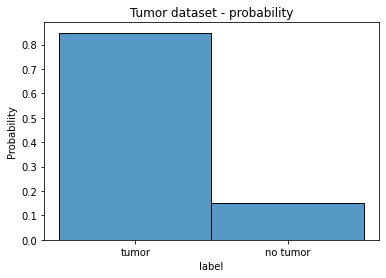

In [10]:
sns.histplot(tumor_labels[tumor_labels.columns[1]], stat="probability").set_title('Tumor dataset - probability')

In [17]:
num_of_classes = 2
input_shape = (512,512,1)
image_dir = "dataset/"
os.listdir(image_dir)

['image', 'label.csv']

In [39]:
train_generator=datagen.flow_from_dataframe(
dataframe=tumor_labels,
directory=image_dir,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

NameError: name 'datagen' is not defined

In [34]:

train_generator=tf.keras.preprocessing.flow_from_dataframe(dataframe=tumor_labels, directory=image_dir, x_col="id", y_col="label", class_mode="categorical", target_size=(32,32), batch_size=32)

AttributeError: module 'keras.api._v2.keras.preprocessing' has no attribute 'flow_from_dataframe'

In [16]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/split_data/binary/",
    labels="inferred",
    batch_size=32
)

Found 3000 files belonging to 2 classes.


In [26]:
vgg16_weight_path = '../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(
    weights=vgg16_weight_path,
    include_top=False, 
    input_shape=(512,512) + (3,)
)


# basic model for now 
model = keras.Sequential(
    [
        keras.Input(shape=(3000, 512,512)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(2, activation="softmax"),
    ]
)
model.compile()
model.fit()

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.  Received: weights=../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

In [68]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        "dataset/",
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        "dataset/",
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 3000 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.
